# <a  name = ""><font color = "brown"> Title 1</font></a>

## <font color = "purple"> Title 2 </font>

### <font color = "green"> Title 3 </font>

#### <font color = "orange"> Title 4 </font>

##### <font color = "darkcyan"> Titltle 5 </font>

> **NOTE:** This is how we do it

<a href = #bottom  style = "text-decoration:none"> go to bottom</a></br>
<a name = "top"></a>

# <font color = "brown"> Content </font>

<a href = #a0  style = "text-decoration:none"> Modelling steps</a></br>

<a href = #a1  style = "text-decoration:none">  Generate classification dataset from sklearn</a>

<a href = #a2  style = "text-decoration:none">  Modelling</a>

# <a  name = "a0"><font color = "brown"> Modelling steps </font></a>

### <font color = "green"> 1. Create or import a model </font>

### <font color = "green"> 2. Compile the model  </font>

### <font color = "green"> 3. Compile the model  </font>

### <font color = "green"> 4. Tweak the model  </font>

### <font color = "green"> 5. Evaluate the model  </font>

### <font color = "green"> 6. Alternate between step 5 and 6 to get the best results  </font>

# <a  name = "a1"><font color = "brown"> Generate classification dataset from sklearn</font></a>

In [13]:
from sklearn.datasets import make_circles
n_samples = 1000 #number of samples 
#creating the circles 
x, y = make_circles(
    n_samples=n_samples,
    shuffle=True,
    noise=0.03,
    random_state=42
)

In [7]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [11]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

### <font color = "green"> Visualize the dataset </font>

In [18]:
import pandas as pd

In [32]:
circles_df = pd.DataFrame(data = {'x0': x[:,0], 'x1': x[:,1], 'y':y})
circles_df

,x0,x1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


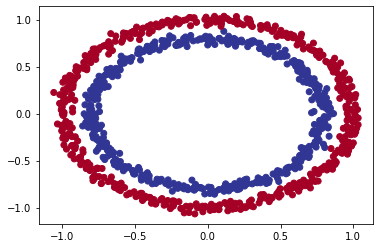

In [39]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c =y , cmap = plt.cm.RdYlBu)

# <a  name = "a2"><font color = "brown"> Modelling</font></a>

In [41]:
import tensorflow as tf
tf.__version__

'2.3.0'

## <font color = "purple"> model_1 </font>

In [55]:
tf.random.set_seed(42)
# create a one layer model with the sequencial API
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
    ]) 
# compile the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"])
# fitting the model
model_1.fit(x,y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 884us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 998us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4820


### <font color = "green"> try more epochs</font>

In [60]:
model_1.fit(x,y, epochs = 200, verbose = 0) #verbose determines how the training will be shown(0,1 0r 2)
model_1.evaluate(x,y) # train set accuracy 

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

## <font color = "purple"> model_2 </font>

### <font color = "green"> try more layers</font>

In [68]:
#Creat/define
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#compile

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"])
#fit
model_2.fit(x,y, epochs = 200, verbose = 0)

In [69]:
model_2.evaluate(x,y) # train set accuracy 

32/32 [==============================] - 0s 822us/step - loss: 0.6938 - accuracy: 0.5000


[0.6937825083732605, 0.5]

> **Observe:** The model seems to be doing a 50% guess work

### <font color = "green"> Visualistion function</font>

In [72]:
import numpy as np

In [86]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


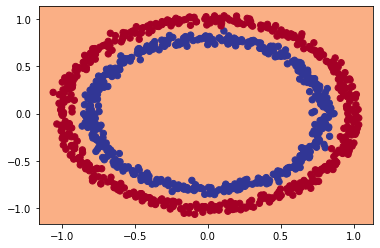

In [87]:
plot_decision_boundary(model_2,x,y)

In [78]:
x[:,0].min()

-1.0595024599098635

In [71]:
x[:,1].min()

-1.0677683182718436

<a href = #top  style = "text-decoration:none" > go to top</a></br>
<a name = "bottom"></a>